<h1>Zero Shot Learning<h1>
<h4>Here we classify our tweets with the zero shot learning method<h4>

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import transformers
import dill
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
test_df = pd.read_pickle('./test_df.pkl')

FileNotFoundError: [Errno 2] No such file or directory: './test_df.pkl'

In [4]:
test_df_cleaned = pd.read_pickle('./test_df_cleaned.pkl')

In [5]:
def performance(y_true,y_predict,y_proba=[]):
    TP = confusion_matrix(y_true,y_predict)[0,0]
    FP = confusion_matrix(y_true,y_predict)[0,1]
    TN = confusion_matrix(y_true,y_predict)[1,1]
    FN = confusion_matrix(y_true,y_predict)[1,0]
    TN, FP, FN, TP = confusion_matrix(y_true,y_predict).ravel()
    print(f"Accuracy: {round(((TP+TN)/(TP+TN+FP+FN))*100,3)}%")
    precision = round((TP/(TP+ FP))*100,3)
    recall = round((TP/(TP+ FN))*100,3)
    print(confusion_matrix(y_true,y_predict,labels=[1,0]).ravel())
    print(f"TP: {TP}")
    print(f"FP: {FP}")
    print(f"TN: {TN}")
    print(f"FN: {FN}")
    print(f"Sensitivity: {round((TP/(TP+ FN))*100,3)}%")
    print(f"Specificity: {round((TN/(TN + FP))*100,3)}%")
    print(f"Precision: {precision}%")
    print(f"Recall: {recall}%")
    print(f"f1: {round(((2*precision*recall)/(precision+recall)),3)}%")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_true,y_predict,labels=[1,0]), display_labels=[1,0])
    cm_display.plot()
    plt.show()
    if (y_proba!=[]):
        false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_true,y_proba)
        print(thresholds)
        area = metrics.auc(false_positive_rate, true_positive_rate)
        plt.figure()
        plt.plot(false_positive_rate, true_positive_rate, color='green', lw=2, label=f'ROC curve (Area Under Curve = {area:.2f})')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

In [5]:
test_df

,level_0,index,author_id,geo,tweetid,lang,like_count,quote_count,reply_count,retweet_count,...,relevant_manualscore,related_score_based,tweet_preprocessed,tweet_tokenized_original,tweet_tokenized_preprocessed,tweet_word2vec_original,tweet_word2vec_preprocessed,context_domain_name,related_manual,context_word2vec
0,1263454,21507,27730996,1981dc44d58103b8,1430122805102841862,en,4,0,0,5,...,None,1,strive achieve ultimate benefit decarbonisatio...,"[Something, for, everyone, to, strive, to, ach...","[strive, achieve, ultimate, benefit, decarboni...","[0.058940856135450304, 0.16088398703141138, -0...","[-0.19140741567720065, -0.026717779057269745, ...","[unified, twitter, taxonomy]",1.0,"[-0.03313020492593447, -0.04405490681529045, -..."
1,57319,423866,388793955,25d3e991f5637f5a,954077360709619712,en,1,0,0,0,...,None,1,total waste time year olds regimented learning...,"[A, total, waste, of, time, ., 4, year, olds, ...","[total, waste, time, year, olds, regimented, l...","[0.09920210521668196, 0.07436473765410483, -0....","[-0.1288429314736277, -0.07036957796663046, -0...",[unknown],0.0,"[0.0014733468415215611, -0.0007524662651121616..."
2,55519,392963,187602448,53b67b1d1cc81a51,988687454143205377,en,2,0,0,0,...,None,1,stevenshorrock rethinkingserv absolutely silos...,"[@, StevenShorrock, @, rethinkingserv, Absolut...","[stevenshorrock, rethinkingserv, absolutely, s...","[-0.009044525710244973, 0.11504029706120492, -...","[-0.14316251415472764, -0.04271398842907869, 0...",[unknown],0.0,"[0.0014733468415215611, -0.0007524662651121616..."
3,1262422,18892,1283005048524505088,50f2d0272381533f,1452543779156680705,en,6,1,0,1,...,None,1,recently reading wetlandsamp importance carbon...,"[For, anyone, recently, reading, about, wetlan...","[recently, reading, wetlandsamp, importance, c...","[-0.014758966863155365, 0.08486172489144585, -...","[-0.20231693579504886, 0.05502894820852412, 0....",[unknown],1.0,"[0.0014733468415215611, -0.0007524662651121616..."
4,1261043,15767,1095999942,7f55e839e1715da2,1483272659198689290,en,0,0,0,0,...,None,0,greatthunberg doubling water vapour emissions ...,"[@, great_thunberg, What, about, doubling, of,...","[greatthunberg, doubling, water, vapour, emiss...","[-0.12774049656846645, 0.042594606945799154, -...","[-0.09085022600797507, 0.14811129753406233, 0....",[unknown],0.0,"[0.0014733468415215611, -0.0007524662651121616..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15800,73950,20045552,135989ad972a5d9d,1040703924095856642,en,0,0,0,0,...,None,1,ready use greenhouse gas reduction methods for...,"[“, Ready, to, use, Greenhouse, Gas, Reduction...","[ready, use, greenhouse, gas, reduction, metho...","[3.064191464255465e-05, -0.008988792473014364,...","[-0.10125270476922967, 0.0708173425295032, -0....",[unknown],1.0,"[0.0014733468415215611, -0.0007524662651121616..."
496,1261061,15809,1095999942,7f55e839e1715da2,1456325197259288580,en,11,0,0,8,...,None,1,grt reporting nafeezahmed exxon mobil capture ...,"[Grt, reporting, from, @, NafeezAhmed, on, Exx...","[grt, reporting, nafeezahmed, exxon, mobil, ca...","[-0.06545602430164683, 0.04987079888712941, -0...","[-0.1494517406515245, -0.011043603864631482, -...","[brand, vertical]",1.0,"[-0.03099814523011446, -0.03970453701913357, -..."
497,1254792,937,915706166482751488,60160252aeb7e3e5,1631663638305034242,en,0,0,0,0,...,None,1,best mothers day travel mug design personalise...,"[Best, Mother, ’, s, Day, Travel, Mug, Design,...","[best, mothers, day, travel, mug, design, pers...","[0.06825140920969155, 0.1343198861532773, -0.0...","[0.2263318127952516, -0.1306500070495531, -0.2...","[events, [, entity, service, ]]",0.0,"[-0.026912789419293405, -0.039827607572078705,..."
498,9534,55263,1095999942,7f55e839e1715da2,1151710790287839232,en,0,0,0,0,...,None,1,albanimrc topnigel disaster carbon storage pot...,"[@, albanimrc, @, topnigel, But, it, is, a, di...","[albanimrc, topnigel, disaster, carbon, storag...","[-0.0481788654

In [11]:
classifier = transformers.pipeline("zero-shot-classification",model="bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [12]:
scores = []
def zero_shot_learning(row):
    message = row
    labels = ["Carbon Capture and Storage","Other"]
    try:
        zsl_result = classifier(message, labels)
        predicted_class = zsl_result['labels'][0]
        score = zsl_result['scores'][0]
        scores.append(score)
    except Exception as e:
        print("For the tweet => ",message)
        print("Error => ",e)
    if (predicted_class == labels[0]):
        return 1
    elif(predicted_class == labels[1]):
        return 0

In [8]:
test_df_cleaned['tweet_preprocessed'].replace('', np.nan, inplace=True)
test_df_cleaned = test_df_cleaned.dropna(subset=['tweet_preprocessed'])
test_df_cleaned

,level_0,index,author_id,geo,tweetid,lang,like_count,quote_count,reply_count,retweet_count,...,ccs_score,rowid,relevant_manualscore,related_score_based,related_manual,tweet_preprocessed,tweet_tokenized_preprocessed,tweet_word2vec_preprocessed,context_domain_name,context_word2vec
0,1,196,1150771325721546754,7d7bdec12d2549d4,1640409818140639232,en,6,0,0,1,...,0,1019,None,0,1.0,feb ground broken new bluecoat academy carring...,"[feb, ground, broken, new, bluecoat, academy, ...","[-0.17708985341295344, -0.09123214083755839, 0...",[unknown],"[0.00023176193644758314, -0.001168469781987369..."
1,20,1000,1233114093629976582,25d3e991f5637f5a,1630937495616495617,en,1,0,0,0,...,0,5018,None,0,1.0,seagrass vital habitat cuttlefish species func...,"[seagrass, vital, habitat, cuttlefish, species...","[-0.32027924060821533, -0.1663591515272856, 0....",[unknown],"[0.00023176193644758314, -0.001168469781987369..."
2,37,2340,20662440,25d3e991f5637f5a,1614419209798258688,en,17,0,1,2,...,0,11679,None,0,1.0,know buying land improve biodiversity carbon s...,"[know, buying, land, improve, biodiversity, ca...","[-0.24470218703808153, -0.021547190833028734, ...",[unknown],"[0.00023176193644758314, -0.001168469781987369..."
3,44,3027,265276284,7ae9e2f2ff7a87cd,1605479146288664576,en,1,0,0,0,...,0,15099,None,0,1.0,aye theres rub tradeoffs optimising annual car...,"[aye, theres, rub, tradeoffs, optimising, annu...","[-0.2432087640399518, -0.07931409381410998, -0...",[unknown],"[0.00023176193644758314, -0.001168469781987369..."
4,126,300,20662440,06168d1feda43857,1639341574445309952,en,0,0,1,0,...,20,1535,None,1,1.0,ccs knowledge sticking carbon capture fossil f...,"[ccs, knowledge, sticking, carbon, capture, fo...","[-0.240239797733151, -0.028277638601139188, -0...",[unknown],"[0.00023176193644758314, -0.001168469781987369..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,68908,392963,187602448,53b67b1d1cc81a51,988687454143205377,en,2,0,0,0,...,1,1169123,None,1,0.0,absolutely silos getting deepertotal new envir...,"[absolutely, silos, getting, deepertotal, new,...","[-0.12502856420663497, 0.07465614553075284, -0...",[unknown],"[0.00023176193644758314, -0.001168469781987369..."
496,70708,423866,388793955,25d3e991f5637f5a,954077360709619712,en,1,0,0,0,...,1,1200261,None,1,0.0,total waste time year olds regimented learning...,"[total, waste, time, year, olds, regimented, l...","[-0.19740079971961677, -0.09446627937722951, -...",[unknown],"[0.00023176193644758314, -0.001168469781987369..."
497,71356,194500,2831955446,720081c4c09a4a84,1198915726486228992,en,1,0,0,0,...,1,870955,None,1,0.0,bp needs resolve environmental issues goes phi...,"[bp, needs, resolve, environmental, issues, go...","[-0.14111729338765144, -0.16012865105377777, 0...","[brand, vertical]","[-0.007221590261906385, 0.0060702532064169645,..."
498,71358,194851,2273675919,1f36c2b60fbc98ac,1198533532781568001,en,65,1,5,3,...,1,872356,None,1,0.0,watched blues leicester game defensive shift c...,"[watched, blues, leicester, game, defensive, s...","[-0.032119659171439705, 0.09410803392529488, -...",[brand],"[-0.00477095041424036, 0.004586540162563324, 0..."


In [18]:
%%time
test_df['related_zero_shot_tweet_original'] = test_df['tweet_original'].apply(zero_shot_learning)

CPU times: user 18min 49s, sys: 1min 9s, total: 19min 58s
Wall time: 1min 52s


In [13]:
%%time
test_df_cleaned['related_zero_shot_tweet_cleaned'] = test_df_cleaned['tweet_preprocessed'].apply(zero_shot_learning)

CPU times: user 15min 48s, sys: 1min 4s, total: 16min 53s
Wall time: 1min 37s


Classification : Original tweet, Manual
Accuracy: 79.4%
[223  27  76 174]
TP: 223
FP: 76
TN: 174
FN: 27
Sensitivity: 89.2%
Specificity: 69.6%
Precision: 74.582%
Recall: 89.2%
f1: 81.239%


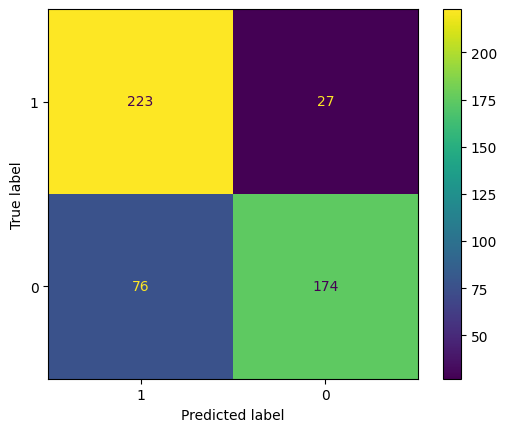

[inf  1.  0.]


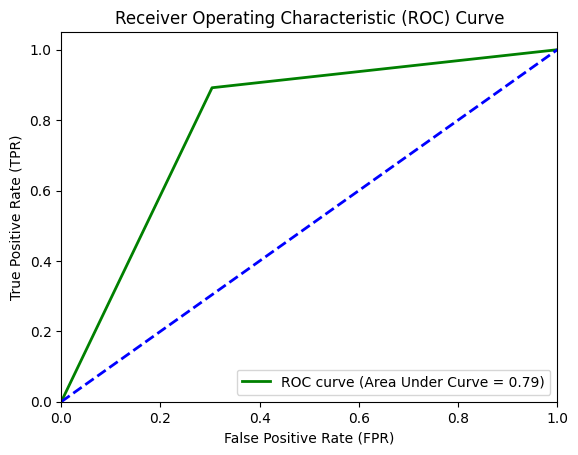

In [186]:
print("Classification : Original tweet, Manual")
performance(test_df['related_manual'],test_df['related_zero_shot_tweet_original'])

Classification : Preprocessed tweet, Manual
Accuracy: 81.69%
[244   6  85 162]
TP: 244
FP: 85
TN: 162
FN: 6
Sensitivity: 97.6%
Specificity: 65.587%
Precision: 74.164%
Recall: 97.6%
f1: 84.283%


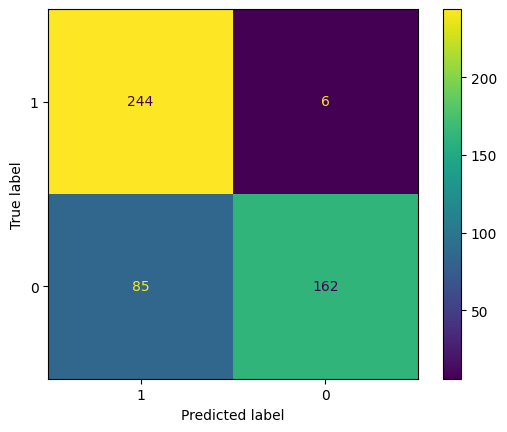

[       inf 0.4959721  0.49557459 0.49508893 0.4950133  0.47846586
 0.47379702 0.47232306 0.47120321 0.46704733 0.46501744 0.45847178
 0.45737344 0.45437765 0.45361614 0.45076662 0.44845384 0.43495607
 0.43411565 0.43146729 0.43024218 0.42510486 0.42432785 0.4168433
 0.41519696 0.4096536  0.40798831 0.40693843 0.40488791 0.4002859
 0.39880961 0.39836758 0.39580023 0.39285845 0.39281923 0.39103669
 0.39099997 0.38845414 0.38692248 0.38537425 0.38524914 0.3847214
 0.38383204 0.37869501 0.37831962 0.37825161 0.37770736 0.37511659
 0.37467015 0.37424189 0.37201536 0.37187123 0.37097162 0.37003422
 0.36869806 0.36782604 0.36760694 0.36741328 0.36673051 0.36639339
 0.36312568 0.36301398 0.36246908 0.36187279 0.3603757  0.36011308
 0.35993707 0.35950536 0.35941923 0.3589105  0.35889786 0.35828912
 0.3575899  0.35646355 0.35618997 0.3552413  0.35474414 0.35432571
 0.35425591 0.35408962 0.35267806 0.35199434 0.35174096 0.3516987
 0.34890521 0.34755731 0.34744561 0.34649909 0.34485638 0.34353578

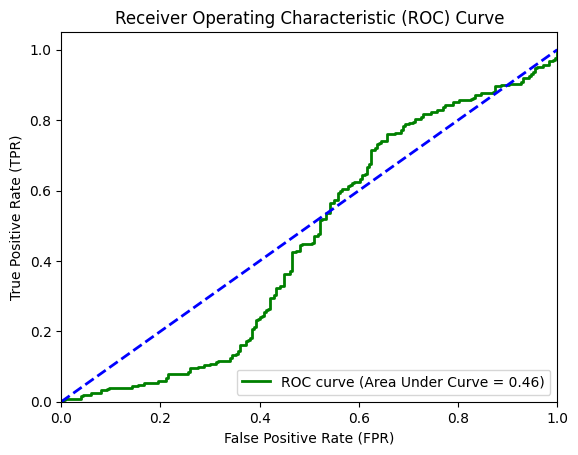

In [17]:
print("Classification : Preprocessed tweet, Manual")
performance(test_df_cleaned['related_manual'],test_df_cleaned['related_zero_shot_tweet_cleaned'],[1-score for score in scores])

In [18]:
scores = []
def zero_shot_learning_bart(row):
    message = row
    labels = ["Carbon Capture and Storage","Other"]
    try:
        zsl_result = classifier_bart(message, labels)
        predicted_class = zsl_result['labels'][0]
        score = zsl_result['scores'][0]
        scores.append(score)
    except Exception as e:
        print("For the tweet => ",message)
        print("Error => ",e)
    if (predicted_class == labels[0]):
        return 1
    elif(predicted_class == labels[1]):
        return 0

In [15]:
classifier_bart = transformers.pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
%%time
test_df['related_zero_shot_tweet_original_bart'] = test_df['tweet_original'].apply(zero_shot_learning_bart)

CPU times: user 1h 22min 19s, sys: 5min 2s, total: 1h 27min 21s
Wall time: 8min 17s


Accuracy: 70.0%
[117 133  17 233]
TP: 117
FP: 17
TN: 233
FN: 133
Sensitivity: 46.8%
Specificity: 93.2%
Precision: 87.313%
Recall: 46.8%
f1: 60.937%


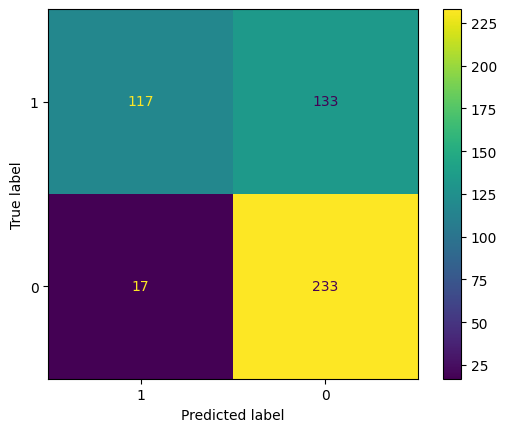

In [18]:
performance(test_df['related_manual'],test_df['related_zero_shot_tweet_original_bart'])

In [19]:
%%time
test_df_cleaned['related_zero_shot_tweet_cleaned_bart'] = test_df_cleaned['tweet_preprocessed'].apply(zero_shot_learning_bart)

CPU times: user 1h 11min 50s, sys: 4min 3s, total: 1h 15min 54s
Wall time: 7min 10s


Accuracy: 78.068%
[155  95  14 233]
TP: 155
FP: 14
TN: 233
FN: 95
Sensitivity: 62.0%
Specificity: 94.332%
Precision: 91.716%
Recall: 62.0%
f1: 73.986%


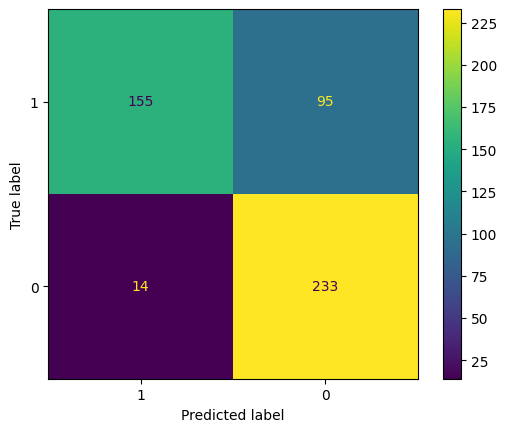

In [21]:
performance(test_df_cleaned['related_manual'], test_df_cleaned['related_zero_shot_tweet_cleaned_bart'])

In [19]:
dill.dump_session('./zeroshot.db')